In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization,concatenate,Conv2DTranspose,Dropout
from tensorflow.keras.models import Model
import tensorflow.keras.losses
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras


In [2]:
data=np.load("/content/drive/My Drive/mydataset_v3.4/mydataset_v4.512.npz adlı dosyanın kopyası")


In [3]:
x=np.uint8(np.float64(np.copy(data["x"]))*255)
y=np.uint8(np.float64(np.copy(data["y"]))*255)
print(y.shape)

(290, 512, 512, 6)


In [4]:


x_train1=x[14:145,:,:]
x_train2=x[159:290,:,:]
x_train=np.concatenate((x_train1,x_train2),axis=None)
x_train=np.reshape(x_train,(262,512,512,1))
x_test=x[0:14,:,:]
x_test=np.reshape(x_test,(14,512,512,1))


#y1=np.zeros([290,512,512,1])
#for i in range (0,290):
  #y1[i,:,:,0]=y[i,:,:,0]+y[i,:,:,1]+y[i,:,:,2]+y[i,:,:,3]+y[i,:,:,4]+y[i,:,:,5]
y1=np.copy(y)
y1=(y1>0.01)*1
y_train1=y1[14:145,:,:]
y_train2=y1[159:290,:,:]
y_train=np.concatenate((y_train1,y_train2),axis=None)
y_train=np.reshape(y_train,(262,512,512,6))
y_test=y1[0:14,:,:]
y_test=np.reshape(y_test,(14,512,512,6))





x_test=x_test/255
y_test=y_test/255
x_train=x_train/255
y_train=y_train/255

1.0


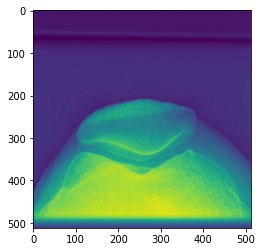

In [5]:
plt.imshow(x_train[32,:,:,0])
print(np.max(x_train))

0.00392156862745098


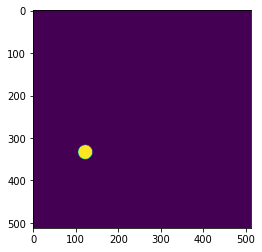

In [6]:
plt.imshow(y_train[32,:,:,0])
print(np.max(y_train))

In [7]:
inputs=Input(shape=(512, 512,1 ))

conv1 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
d1=Dropout(0.15)(conv1)
conv2 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d1)
b=BatchNormalization()(conv2)

pool1 = MaxPooling2D(pool_size=(2, 2))(b)
conv3 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
d2=Dropout(0.2)(conv3)
conv4 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d2)
b1=BatchNormalization()(conv4)

pool2 = MaxPooling2D(pool_size=(2, 2))(b1)
conv5 = Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
d3=Dropout(0.3)(conv5)
conv6 = Conv2D(128,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d3)
b2=BatchNormalization()(conv6)

pool3 = MaxPooling2D(pool_size=(2, 2))(b2)
conv7 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
d4=Dropout(0.4)(conv7)
conv8 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d4)
b3=BatchNormalization()(conv8)

pool4 = MaxPooling2D(pool_size=(2, 2))(b3)
conv9 = Conv2D(512,(3,3),activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
d5=Dropout(0.5)(conv9)
conv10 = Conv2D(512,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d5)
b4=BatchNormalization()(conv10)


conv11 = Conv2DTranspose(512,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(conv10)
x= concatenate([conv11,conv8])
conv12 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x)
d6=Dropout(0.4)(conv12)
conv13 = Conv2D(256,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d6)
b5=BatchNormalization()(conv13)


conv14 = Conv2DTranspose(256,(4,4), activation = 'relu', padding = 'same', strides=(2,2),kernel_initializer = 'he_normal')(b5)
x1=concatenate([conv14,conv6])
conv15 = Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x1)
d7=Dropout(0.3)(conv15)
conv16 = Conv2D(128,3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d7)
b6=BatchNormalization()(conv16)

conv17 = Conv2DTranspose(128,(4,4), activation ='relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b6)
x2=concatenate([conv17,conv4])
conv18 = Conv2D(64,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x2)
d8=Dropout(0.2)(conv18)
conv19 = Conv2D(64,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d8)
b7=BatchNormalization()(conv19)

conv20 = Conv2DTranspose(64,(4,4), activation = 'relu', padding = 'same',strides=(2,2), kernel_initializer = 'he_normal')(b7)
x3=concatenate([conv20,conv2])
conv21 = Conv2D(32,(3,3) ,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(x3)
d9=Dropout(0.1)(conv21)
conv22 = Conv2D(32,(3,3), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(d9)

outputs = Conv2D(6,(1,1), activation = 'sigmoid', padding = 'same', kernel_initializer = 'he_normal')(conv22)
model2 = Model( inputs = inputs, outputs = outputs)


model2.compile(optimizer ="adam", loss = "binary_crossentropy", metrics = ['binary_accuracy'])


model2.fit(x_train,y_train,batch_size=2,epochs=150,verbose=1)

Epoch 1/150
131/131 [==============================] - 19s 145ms/step - loss: 0.0186 - binary_accuracy: 0.9899
Epoch 2/150
131/131 [==============================] - 19s 146ms/step - loss: 1.9566e-04 - binary_accuracy: 0.9967
Epoch 3/150
131/131 [==============================] - 19s 146ms/step - loss: 1.7625e-04 - binary_accuracy: 0.9967
Epoch 4/150
131/131 [==============================] - 19s 147ms/step - loss: 1.6575e-04 - binary_accuracy: 0.9967
Epoch 5/150
131/131 [==============================] - 19s 146ms/step - loss: 1.6074e-04 - binary_accuracy: 0.9967
Epoch 6/150
131/131 [==============================] - 19s 146ms/step - loss: 1.5936e-04 - binary_accuracy: 0.9967
Epoch 7/150
131/131 [==============================] - 19s 146ms/step - loss: 1.5362e-04 - binary_accuracy: 0.9967
Epoch 8/150
131/131 [==============================] - 19s 147ms/step - loss: 1.4840e-04 - binary_accuracy: 0.9967
Epoch 9/150
131/131 [==============================] - 19s 147ms/step - loss: 1.4699

In [8]:
pred=model2.predict(x_test[0:8,:,:,:])



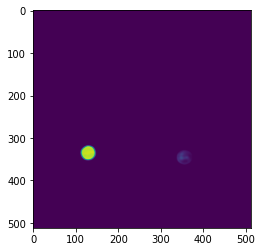

In [9]:
plt.imshow(pred[6,:,:,0])

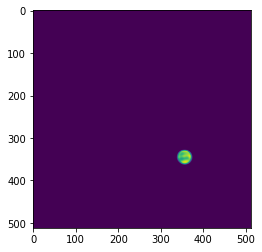

In [24]:
plt.imshow(pred[6,:,:,2])

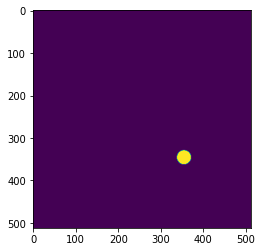

In [25]:
plt.imshow(y_test[6,:,:,2])

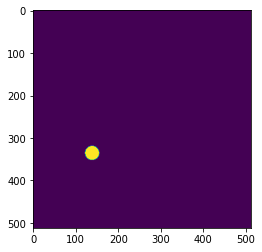

In [12]:
plt.imshow(y_test[1,:,:,0])